#### Structure Equation Modelling

In [58]:
# make sure to use python 3.7
!python --version

Python 3.7.9


In [41]:
from semopy import Model
# from semopy import examples as eg
# import semopy

The dataset contains various measures of political democracy and industrialization in developing countries. This data set includes four measures of democracy at two points in time, 1960 and 1965, and three measures of industrialization in 1960, for 75 developing countries. It's from the Bollen's 1989 book.

In [59]:
data = semopy.examples.political_democracy.get_data()
data.head()

,y1,y2,y3,y4,y5,y6,y7,y8,x1,x2,x3
1,2.50,0.000000,3.333333,0.000000,1.250000,0.000000,3.726360,3.333333,4.442651,3.637586,2.557615
2,1.25,0.000000,3.333333,0.000000,6.250000,1.100000,6.666666,0.736999,5.384495,5.062595,3.568079
3,7.50,8.800000,9.999998,9.199991,8.750000,8.094061,9.999998,8.211809,5.961005,6.255750,5.224433
4,8.90,8.800000,9.999998,9.199991,8.907948,8.127979,9.999998,4.615086,6.285998,7.567863,6.267495
5,10.00,3.333333,9.999998,6.666666,7.500000,3.333333,9.999998,6.666666,5.863631,6.818924,4.573679


We need to Instantiate the Model, set it up using SEM model description in semopy syntax.

```
desc = """
            PE ~ CI
            PE =~ PE1+PE2+PE3+PE4+PE5
            CI =~ CI1+CI2+CI3+CI4+CI4+CI5+CI6+CI7
       """    
model = Model(desc)
```
       
Here we are using the built in political democracy model.

In [61]:
desc = semopy.examples.political_democracy.get_model()
print(desc)

# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


In [66]:
mod = Model(desc)
res = mod.fit(data)
print(res)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.508
Number of iterations: 52
Params: 2.180 1.819 1.257 1.058 1.265 1.186 1.280 1.266 1.482 0.572 0.838 0.624 1.893 1.320 2.156 7.385 0.793 5.067 0.347 3.148 1.357 4.954 3.430 2.352 0.120 0.172 3.951 0.082 0.467 3.256 0.448


For the fit method we can use 3 arguments.
- Data - In the form of Pandas Dataframe
- obj - Objective function
    - MLW - Wishart loglikelihood
    - ULS - Unweighted Least Squares
    - GLS - Generalized Least Squares
    - FIML- Full Information Maximum Likelihood
- solver - Optimization method
    - SLSQP

In [64]:
ins = mod.inspect()
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,dem60,~,ind60,1.482379,0.399024,3.71502,0.00020319
1,dem65,~,ind60,0.571912,0.221383,2.58336,0.00978421
2,dem65,~,dem60,0.837574,0.0984456,8.50799,0
3,x1,~,ind60,1.000000,-,-,-
4,x2,~,ind60,2.180494,0.138565,15.7363,0
5,x3,~,ind60,1.818546,0.151993,11.9646,0
6,y1,~,dem60,1.000000,-,-,-
7,y2,~,dem60,1.256819,0.182687,6.87965,6.00009e-12
8,y3,~,dem60,1.058174,0.151521,6.9837,2.87503e-12
9,y4,~,dem60,1.265186,0.145151,8.71634,0


In [69]:
# do this otherwise it will throw an AttributeError: 'module' object has no attribute
import semopy
from importlib import reload
reload(semopy)

<module 'semopy' from '/home/prodigalson/.virtualenv/sem/lib/python3.7/site-packages/semopy/__init__.py'>

In [70]:
data = semopy.examples.political_democracy.get_data()
model = semopy.examples.political_democracy.get_model()
mod = semopy.Model(model)
mod.fit(data)
plot = semopy.semplot(mod, "plot.png")

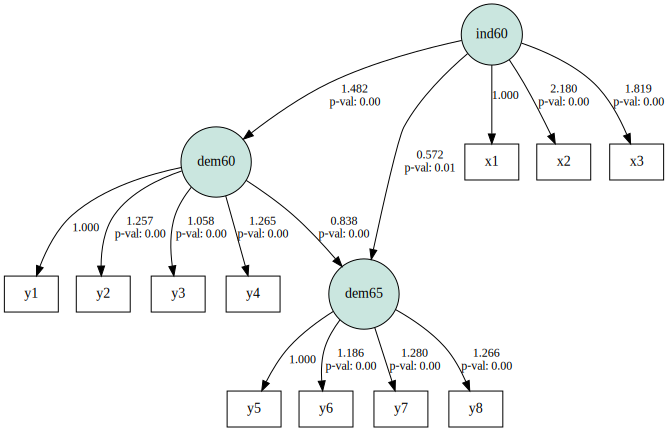

In [71]:
plot

In [72]:
import numpy as np
import pandas as pd

In [74]:
np.random.seed(123)

N = 100
eta1 = np.random.normal(size=N)
eta2 = np.random.normal(size=N)
eta1 += 0.3 * eta2

y1 = np.random.normal(size=N, scale=0.5) + eta1
y2 = np.random.normal(size=N, scale=0.5) + 2 * eta1
y3 = np.random.normal(size=N, scale=0.5) + 3 * eta1 + eta2
y4 = np.random.normal(size=N, scale=0.5) - eta2
y5 = np.random.normal(size=N, scale=0.5) + 1.5 * eta2
x = np.random.normal(size=N)
data = pd.DataFrame([y1, y2, y3, y4, y5, x],
                    index=['y1', 'y2', 'y3', 'y4', 'y5', 'x']).T

print(semopy.efa.explore_cfa_model(data))

eta1 =~ y2 + y3 + y1
eta2 =~ y5 + y4 + y3

